In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/first-week-prediction/opt_submission.csv
/kaggle/input/first-week-prediction/__results__.html
/kaggle/input/first-week-prediction/Adaboost_submission.csv
/kaggle/input/first-week-prediction/submission.csv
/kaggle/input/first-week-prediction/__notebook__.ipynb
/kaggle/input/first-week-prediction/custom.css
/kaggle/input/first-week-prediction/__output__.json
/kaggle/input/first-week-prediction/__results___files/__results___84_0.png
/kaggle/input/first-week-prediction/__results___files/__results___133_0.png
/kaggle/input/first-week-prediction/__results___files/__results___135_0.png
/kaggle/input/first-week-prediction/__results___files/__results___141_1.png
/kaggle/input/first-week-prediction/__results___files/__results___24_1.png
/kaggle/input/first-week-prediction/__results___files/__results___147_0.png
/kaggle/input/first-week-prediction/__results___files/__results___27_1.png
/kaggle/input/first-week-prediction/__results___files/__results___93_0.png
/kaggle/input/first-wee

## Import Data

In [78]:
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')
test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/test.csv')
submission = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/submission.csv')

In [79]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [80]:
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


## Exploratory Data Analysis

In [81]:
# train_profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# train_profile

In [82]:
# test_profile = ProfileReport(test, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# test_profile

In [83]:
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"
py.init_notebook_mode(connected=True)

### Disease spread over the countries

In [84]:
temp = train.groupby(['Date', 'Country/Region'])['ConfirmedCases'].sum().reset_index()
temp['Date'] = pd.to_datetime(temp['Date']).dt.strftime('%m/%d/%Y')
temp['size'] = temp['ConfirmedCases'].pow(0.3) * 3.5

fig = px.scatter_geo(temp, locations="Country/Region", locationmode='country names', 
                     color="ConfirmedCases", size='size', hover_name="Country/Region", 
                     range_color=[1,100],
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Cases Over Time', color_continuous_scale="greens")
fig.show()

### Confirmed cases over time

In [85]:
grouped = train.groupby('Date')['Date', 'ConfirmedCases', 'Fatalities'].sum().reset_index()

fig = px.line(grouped, x="Date", y="ConfirmedCases", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="Date", y="ConfirmedCases", 
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

In [86]:
latest_grouped = train.groupby('Country/Region')['ConfirmedCases', 'Fatalities'].sum().reset_index()

In [87]:
fig = px.bar(latest_grouped.sort_values('ConfirmedCases', ascending=False)[:20][::-1], 
             x='ConfirmedCases', y='Country/Region',
             title='Confirmed Cases Worldwide', text='ConfirmedCases', height=1000, orientation='h')
fig.show()

### Take a look at Europe

In [88]:
europe = list(['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
               'Italy', 'Latvia','Luxembourg','Lithuania','Malta','Norway','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia',
               'Spain', 'Sweden', 'United Kingdom', 'Iceland', 'Russia', 'Switzerland', 'Serbia', 'Ukraine', 'Belarus',
               'Albania', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia'])
europe_grouped_latest = latest_grouped[latest_grouped['Country/Region'].isin(europe)]

In [89]:
temp = train[train['Country/Region'].isin(europe)]
temp = temp.groupby(['Date', 'Country/Region'])['ConfirmedCases'].sum().reset_index()
temp['Date'] = pd.to_datetime(temp['Date']).dt.strftime('%m/%d/%Y')
temp['size'] = temp['ConfirmedCases'].pow(0.3) * 3.5

fig = px.scatter_geo(temp, locations="Country/Region", locationmode='country names', 
                     color="ConfirmedCases", size='size', hover_name="Country/Region", 
                     range_color=[1,100],scope='europe',
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Cases Over Time', color_continuous_scale='Cividis_r')
fig.show()

In [90]:
fig = px.bar(europe_grouped_latest.sort_values('ConfirmedCases', ascending=False)[:10][::-1], 
             x='ConfirmedCases', y='Country/Region', color_discrete_sequence=['#84DCC6'],
             title='Confirmed Cases in Europe', text='ConfirmedCases', orientation='h')
fig.show()

### take a look at US

In [91]:
usa = train[train['Country/Region'] == "US"]
usa_latest = usa[usa['Date'] == max(usa['Date'])]
usa_latest = usa_latest.groupby('Province/State')['ConfirmedCases', 'Fatalities'].max().reset_index()
fig = px.bar(usa_latest.sort_values('ConfirmedCases', ascending=False)[:10][::-1], 
             x='ConfirmedCases', y='Province/State', color_discrete_sequence=['#D63230'],
             title='Confirmed Cases in USA', text='ConfirmedCases', orientation='h')
fig.show()

In [200]:
usa = train[train['Country/Region'] == "US"]
usa_latest = usa[usa['Date'] == max(usa['Date'])]
usa_latest = usa_latest.groupby(['Province/State','Lat','Long'])['ConfirmedCases', 'Fatalities'].max().reset_index()
fig = go.Figure()
limits = [(0,2),(3,10),(11,20),(21,30),(31,40)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]

for i in range(len(limits)):
    lim = limits[i]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = usa_latest['Long'],
        lat = usa_latest['Lat'],
        text = usa_latest['Province/State'],
        marker = dict(
            size = usa_latest['ConfirmedCases'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode='area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'COVID19 in the US',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

### take a look at China

In [92]:
usa = train[train['Country/Region'] == "China"]
usa_latest = usa[usa['Date'] == max(usa['Date'])]
usa_latest = usa_latest.groupby('Province/State')['ConfirmedCases', 'Fatalities'].max().reset_index()
fig = px.bar(usa_latest.sort_values('ConfirmedCases', ascending=False)[:10][::-1], 
             x='ConfirmedCases', y='Province/State', color_discrete_sequence=['#D63230'],
             title='Confirmed Cases in USA', text='ConfirmedCases', orientation='h')
fig.show()

## Encoding Categorical Data

1. Province Encoding
2. Country Encoding
3. Date Encoding
4. Extra Dataset
5. Missing Value Imputation

### Province Encoding
Province is a string-type object in the dataset. To take advantage of them, we convert Province to a numeric index as shown below. `province_encoded` collects all states in the training data. Specially, `nan` cells indicate to index `0` avoiding missing data.

In [93]:
province_encoded = {state:index for index, state in enumerate(train['Province/State'].unique())}

In [94]:
train['province_encoded'] = train['Province/State'].apply(lambda x: province_encoded[x])
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0


### Country Encoding

In [95]:
country_encoded = dict(enumerate(train['Country/Region'].unique()))
country_encoded = dict(map(reversed, country_encoded.items()))

In [96]:
train['country_encoded'] = train['Country/Region'].apply(lambda x: country_encoded[x])
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded,country_encoded
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0


### Date Encoding: sequential timestamp (poor design)

In [97]:
from datetime import datetime
import time

In [98]:
# date_encoded = {}
# for s in train['Date'].unique():
#     date_encoded[s] = time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple())

In [99]:
# train['date_encoded'] = train['Date'].apply(lambda x: date_encoded[x])
# train['date_encoded'] = (train['date_encoded'] - train['date_encoded'].mean()) / train['date_encoded'].std()
# train.head()

### Date encoding: convert `y-m-d`  to Month.and Day.

In [100]:
train['Mon'] = train['Date'].apply(lambda x: int(x.split('-')[1]))
train['Day'] = train['Date'].apply(lambda x: int(x.split('-')[2]))

### Date encoding: enhance by serial fetures (poor design)

In [101]:
train['serial'] = train['Mon'] * 30 + train['Day']
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded,country_encoded,Mon,Day,serial
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0,1,22,52
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0,1,23,53
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0,1,24,54
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0,1,25,55
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0,1,26,56


In [102]:
train['serial'] = train['serial'] - train['serial'].min()

In [103]:
train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,province_encoded,country_encoded,Mon,Day,serial
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737,29.302817,86.144366,2.222222,15.873016,30.539683
std,7624.675152,22.935092,79.923261,3538.599684,174.346267,40.528725,54.689925,0.700234,8.625586,18.367863
min,1.000000,-41.454500,-157.498300,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000,0.000000,29.000000,2.000000,8.000000,14.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000,0.000000,83.500000,2.000000,16.000000,30.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000,57.250000,152.250000,3.000000,23.000000,47.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000,128.000000,162.000000,3.000000,31.000000,62.000000


### Extra Dataset

In [104]:
gdp2020 = pd.read_csv('/kaggle/input/gdp2020/GDP2020.csv')
population2020 = pd.read_csv('/kaggle/input/population2020/population2020.csv')

In [105]:
gdp2020 = gdp2020.rename(columns={"rank":"rank_gdp"})
gdp2020_numeric_list = [list(gdp2020)[0]] + list(gdp2020)[2:-1]
gdp2020.head()

,rank_gdp,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,United States,2.219812e+13,18624475000000,67063.2695,331002.651
1,2,China,1.546810e+13,11218281029298,10746.7828,1439323.776
2,3,Japan,5.495420e+12,4936211827875,43450.1405,126476.461
3,4,Germany,4.157120e+12,3477796274497,49617.1450,83783.942
4,5,India,3.257720e+12,2259642382872,2360.6592,1380004.385


#### Redefine all mismatch Country 

In [106]:
map_state = {'US':'United States', 
             'Korea, South':'South Korea',
             'Cote d\'Ivoire':'Ivory Coast',
             'Czechia':'Czech Republic',
             'Eswatini':'Swaziland',
             'Holy See':'Vatican City',
             'Jersey':'United Kingdom',
             'North Macedonia':'Macedonia',
             'Taiwan*':'Taiwan',
             'occupied Palestinian territory':'Palestine'
            }
map_state_rev = {v: k for k, v in map_state.items()}

In [107]:
population2020['name'] = population2020['name'].apply(lambda x: map_state_rev[x] if x in map_state_rev else x)
gdp2020['country'] = gdp2020['country'].apply(lambda x: map_state_rev[x] if x in map_state_rev else x)

#### Losing Country in Population

In [108]:
set(train['Country/Region']) - set(population2020['name'])

{'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Cruise Ship',
 'Gambia, The',
 'Guernsey',
 'Kosovo',
 'The Bahamas',
 'The Gambia',
 'United Kingdom'}

#### Losing Country in GDP2020

In [109]:
set(train['Country/Region']) - set(gdp2020['country'])

{'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Cruise Ship',
 'French Guiana',
 'Gambia, The',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Holy See',
 'Kosovo',
 'Martinique',
 'Mayotte',
 'Reunion',
 'The Bahamas',
 'The Gambia',
 'United Kingdom'}

In [110]:
population2020 = population2020.rename(columns={"rank":"rank_pop"})
population2020_numeric_list = [list(population2020)[0]] + list(gdp2020)[2:]
population2020.head()

,rank_pop,name,density,densityMi,pop2020,area
0,1,Macau,21644.5000,56059.2550,649.335,30.00
1,2,Monaco,19426.7327,50315.2376,39.242,2.02
2,3,Singapore,8239.9183,21341.3884,5850.342,710.00
3,4,Hong Kong,6790.7437,17588.0261,7496.981,1104.00
4,5,Gibraltar,5615.1667,14543.2817,33.691,6.00


In [111]:
train = pd.merge(train, population2020, how='left', left_on = 'Country/Region', right_on = 'name')
train = pd.merge(train, gdp2020, how='left', left_on = 'Country/Region', right_on = 'country')

### Drop Nan cells or repalce them to more suitable values

In [112]:
train.isnull().sum()

Id                     0
Province/State      9702
Country/Region         0
Lat                    0
Long                   0
Date                   0
ConfirmedCases         0
Fatalities             0
province_encoded       0
country_encoded        0
Mon                    0
Day                    0
serial                 0
rank_pop             819
name                 819
density              819
densityMi            819
pop2020              819
area                 819
rank_gdp            1260
country             1260
imfGDP              1260
unGDP               1260
gdpPerCapita        1260
pop                 1260
dtype: int64

#### Set extra attributes to zero

In [113]:
train = train.fillna(0)

Which country has `nan` coordinate ?

In [114]:
train['Country/Region'][train.isnull()['Lat'] | train.isnull()['Long']].unique()

array([], dtype=object)

Find out coordinate in Aruba from extra information

In [115]:
# train.loc[:,'Lat'][train['Country/Region']=='Aruba'] = -69.9683
# train.loc[:,'Long'][train['Country/Region']=='Aruba'] = 12.5211

## Generate the numeric input for training

In [116]:
# numeric_features_X = ['Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day']
numeric_features_X = ['Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day'] + population2020_numeric_list + gdp2020_numeric_list
numeric_features_Y = ['ConfirmedCases', 'Fatalities']
train_numeric_X = train[numeric_features_X]
train_numeric_Y = train[numeric_features_Y]

## Generate the numeric input for testing 

In [117]:
test['province_encoded'] = test['Province/State'].apply(lambda x: province_encoded[x] if x in province_encoded else max(province_encoded.values())+1)

In [118]:
test['country_encoded'] = test['Country/Region'].apply(lambda x: country_encoded[x] if x in country_encoded else max(country_encoded.values())+1)

In [119]:
test['Mon'] = test['Date'].apply(lambda x: int(x.split('-')[1]))
test['Day'] = test['Date'].apply(lambda x: int(x.split('-')[2]))

In [120]:
test['serial'] = test['Mon'] * 30 + test['Day']
test['serial'] = test['serial'] - test['serial'].min()

In [121]:
test = pd.merge(test, population2020, how='left', left_on = 'Country/Region', right_on = 'name')
test = pd.merge(test, gdp2020, how='left', left_on = 'Country/Region', right_on = 'country')

In [122]:
# date_encoded = {}
# for s in test['Date'].unique():
#     date_encoded[s] = time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple())
# test['date_encoded'] = test['Date'].apply(lambda x: date_encoded[x])
# test['date_encoded'] = (test['date_encoded'] - test['date_encoded'].mean()) / test['date_encoded'].std()
# test.head()

In [123]:
# test.loc[:,'Lat'][test['Country/Region']=='Aruba'] = -69.9683
# test.loc[:,'Long'][test['Country/Region']=='Aruba'] = 12.5211

In [124]:
test_numeric_X = test[numeric_features_X]
test_numeric_X.isnull().sum()

Lat                   0
Long                  0
province_encoded      0
country_encoded       0
Mon                   0
Day                   0
rank_pop            559
imfGDP              860
unGDP               860
gdpPerCapita        860
pop                 860
rank_gdp            860
imfGDP              860
unGDP               860
gdpPerCapita        860
dtype: int64

In [129]:
test_numeric_X = test_numeric_X.fillna(-1)

## Model
#### Single Model 
1. Linear Regression
2. SVM Regression
3. KNN 

#### Ensemble 
1. Random Forest
2. Adaboost 

#### SIR Model

### Linear Regression

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [126]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', LinearRegression())])
pipeline.fit(train_numeric_X, train_numeric_Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [130]:
predicted = pipeline.predict(test_numeric_X)

In [131]:
# submission = np.vstack((test['ForecastId'], predicted[:,0],predicted[:,1])).T
# submission.astype(np.int32)
# df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('LR_submission.csv', index=False)

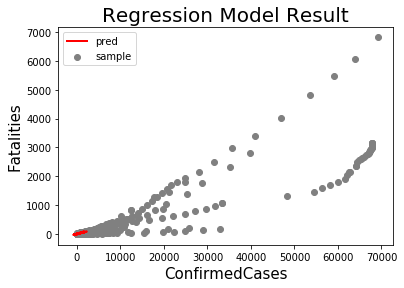

In [132]:
predicted_x = pipeline.predict(train_numeric_X)
plt.scatter(train_numeric_Y['ConfirmedCases'], train_numeric_Y['Fatalities'],  color='gray', label='sample')
plt.plot(predicted_x[:,0], predicted_x[:,1], color='red', linewidth=2, label='pred')
plt.title('Regression Model Result',fontsize=20)
plt.xlabel('ConfirmedCases',fontsize=15)
plt.ylabel('Fatalities',fontsize=15)
plt.legend()
plt.show()

### SVR

In [133]:
from sklearn.svm import SVR

In [134]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', SVR())])
pipeline.fit(train_numeric_X, train_numeric_Y.values[:,0])
pipeline2 = Pipeline([('scaler', StandardScaler()), ('estimator', SVR())])
pipeline2.fit(train_numeric_X, train_numeric_Y.values[:,1])
discovered, fatal = pipeline.predict(test_numeric_X), pipeline2.predict(test_numeric_X)

In [135]:
# submission = np.vstack((test['ForecastId'], discovered, fatal)).T
# submission = submission.astype(np.int32)
# df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('SVR_submission.csv', index=False)
# df.to_csv('submission.csv', index=False)

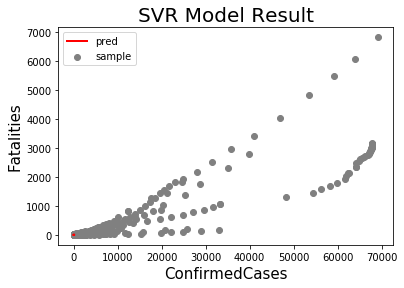

In [136]:
predicted_x1 = pipeline.predict(train_numeric_X)
predicted_x2 = pipeline2.predict(train_numeric_X)

plt.scatter(train_numeric_Y['ConfirmedCases'], train_numeric_Y['Fatalities'],  color='gray', label='sample')
plt.plot(predicted_x1, predicted_x2, color='red', linewidth=2, label='pred')
plt.title('SVR Model Result',fontsize=20)
plt.xlabel('ConfirmedCases',fontsize=15)
plt.ylabel('Fatalities',fontsize=15)
plt.legend()
plt.show()

### KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', KNeighborsClassifier(n_jobs=4))])
pipeline.fit(train_numeric_X, train_numeric_Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=4, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

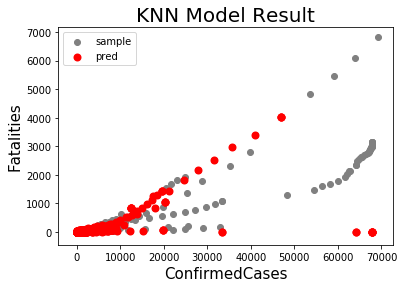

In [139]:
predicted_x = pipeline.predict(train_numeric_X)
plt.scatter(train_numeric_Y['ConfirmedCases'], train_numeric_Y['Fatalities'],  color='gray', label='sample')
plt.scatter(predicted_x[:,0], predicted_x[:,1], color='red', linewidth=2, label='pred')
plt.title('KNN Model Result',fontsize=20)
plt.xlabel('ConfirmedCases',fontsize=15)
plt.ylabel('Fatalities',fontsize=15)
plt.legend()
plt.show()

## Ensemble

### Bagging: Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
RF_model = RandomForestClassifier(n_estimators=50,n_jobs=4,verbose=True)
RF_model.fit(train_numeric_X, train_numeric_Y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=True,
                       warm_start=False)

In [142]:
# predicted = RF_model.predict(test_numeric_X)
# submission = np.vstack((test['ForecastId'], predicted[:,0],predicted[:,1])).T
# submission = submission.astype(np.int32)
# df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('RF_submission.csv', index=False)
# df.to_csv('submission.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.3s finished


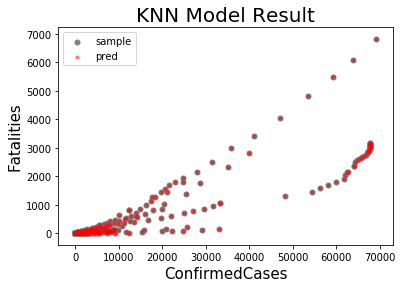

In [143]:
predicted_x = RF_model.predict(train_numeric_X)
plt.scatter(train_numeric_Y['ConfirmedCases'], train_numeric_Y['Fatalities'],  color='gray', label='sample',s=25)
plt.scatter(predicted_x[:,0], predicted_x[:,1], color='red', label='pred',alpha=.4, s=10)
plt.title('KNN Model Result',fontsize=20)
plt.xlabel('ConfirmedCases',fontsize=15)
plt.ylabel('Fatalities',fontsize=15)
plt.legend()
plt.show()

### Boosting: Adaboost

In [144]:
from sklearn.ensemble import AdaBoostClassifier

In [145]:
adaboost_model_for_ConfirmedCases = AdaBoostClassifier(n_estimators=15)
adaboost_model_for_ConfirmedCases.fit(train_numeric_X, train_numeric_Y[numeric_features_Y[0]])
adaboost_model_for_Fatalities = AdaBoostClassifier(n_estimators=15)
adaboost_model_for_Fatalities.fit(train_numeric_X, train_numeric_Y[numeric_features_Y[1]])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=15, random_state=None)

In [146]:
# predicted = adaboost_model_for_ConfirmedCases.predict(test_numeric_X)
# predicted2 = adaboost_model_for_Fatalities.predict(test_numeric_X)
# submission = np.vstack((test['ForecastId'], predicted,predicted2)).T
# submission = submission.astype(np.int32)
# df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('Adaboost_submission.csv', index=False)
# df.to_csv('submission.csv', index=False)

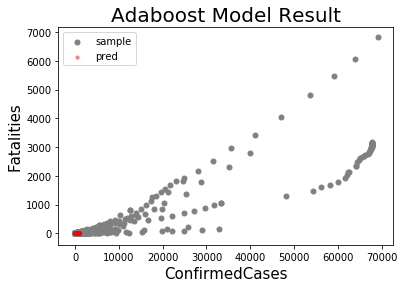

In [147]:
predicted_x1 = adaboost_model_for_ConfirmedCases.predict(train_numeric_X)
predicted_x2 = adaboost_model_for_Fatalities.predict(train_numeric_X)

plt.scatter(train_numeric_Y['ConfirmedCases'], train_numeric_Y['Fatalities'],  color='gray', label='sample',s=25)
plt.scatter(predicted_x1,predicted_x2, color='red', label='pred',alpha=.4, s=10)
plt.title('Adaboost Model Result',fontsize=20)
plt.xlabel('ConfirmedCases',fontsize=15)
plt.ylabel('Fatalities',fontsize=15)
plt.legend()
plt.show()

### Stacking

In [ ]:
# from sklearn.ensemble import StackingClassifier

In [ ]:
# estimators = [('rf',RF_model ), ('ada', adaboost_model_for_ConfirmedCases)]
# stacking_model_for_ConfirmedCases = StackingClassifier(estimators=estimators, n_jobs=4)
# stacking_model_for_ConfirmedCases.fit(train_numeric_X, train_numeric_Y[numeric_features_Y[0]])

In [ ]:
# stacking_model_for_Fatalities = StackingClassifier(estimators=estimators, n_jobs=4)
# stacking_model_for_Fatalities.fit(train_numeric_X, train_numeric_Y[numeric_features_Y[1]])

In [ ]:
# predicted = stacking_model_for_ConfirmedCases.predict(test_numeric_X)
# predicted2 = stacking_model_for_Fatalities.predict(test_numeric_X)

# submission = np.vstack((test['ForecastId'], predicted,predicted2)).T
# submission = submission.astype(np.int32)

# df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('stacking_submission.csv', index=False)
# df.to_csv('submission.csv', index=False)

### Basic Model Comparasion

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from mlxtend.classifier import StackingCVClassifier

In [151]:
clf1 = KNeighborsClassifier(n_neighbors=100)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = GaussianNB()
# Logit will be used for stacking
lr = LogisticRegression(solver='lbfgs')
# sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr, use_probas=True, cv=3)
sclf = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=lr, use_probas=True, cv=3)


# Do CV
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, train_numeric_X.values, train_numeric_Y[numeric_features_Y[0]].values, cv=3, scoring='neg_mean_squared_log_error')
    print("Avg_rmse: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Avg_rmse: -6.54 (+/- 1.83) [KNN]


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Avg_rmse: -6.90 (+/- 6.18) [Random Forest]


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Avg_rmse: -25.89 (+/- 1.19) [Naive Bayes]


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning:

Number of classes in training fold (678) does not match total number of classes (838). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning:

Number of classes in training fold (678) does not match total number of classes (838). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds

/opt

Avg_rmse: -4.76 (+/- 1.86) [StackingClassifier]


- KNN: -6.54
- Random Forest: -6.90
- Naive Bayes: -25.89
- StackingClassifier: -4.76

### After Model Comparing, here provide an optimal result 

- KNN attains the better performance than others w.r.t. Fatalities
- RF attains the better performance than others w.r.t. ConfirmedCases

In [ ]:
# clf1 = KNeighborsClassifier(n_neighbors=100)
# clf1.fit(train_numeric_X.values, train_numeric_Y[numeric_features_Y[1]])
# predicted2 = clf1.predict(test_numeric_X)

# clf2 = RandomForestClassifier(n_estimators=10)
# clf2.fit(train_numeric_X.values, train_numeric_Y[numeric_features_Y[0]])
# predicted = clf2.predict(test_numeric_X)

# submission = np.vstack((test['ForecastId'], predicted,predicted2)).T
# submission = submission.astype(np.int32)
# df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('opt_submission.csv', index=False)
# df.to_csv('submission.csv', index=False)

### SIR Model (Not yet)

## Evaluation

In [153]:
train_y_pred = RF_model.predict(train_numeric_X)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.2s finished


In [ ]:
# train_y_pred2 = clf2.predict(train_numeric_X)
# train_y_pred =  np.stack((train_y_pred, train_y_pred2), axis=-1)

#### Actual Value v.s. Predicted Results

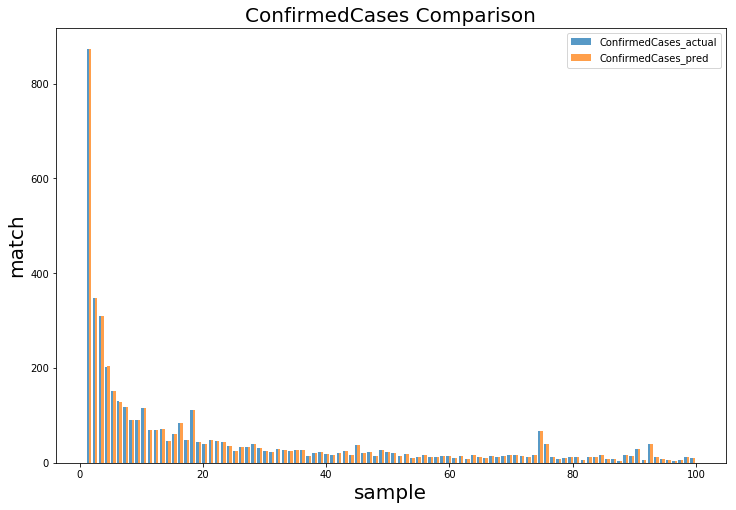

In [154]:
plt.figure(figsize=(12,8))
plt.hist([train_numeric_Y['ConfirmedCases'],train_y_pred[:,0]],bins=100, range=(1,100), label=['ConfirmedCases_actual','ConfirmedCases_pred'],alpha=0.75)
plt.title('ConfirmedCases Comparison',fontsize=20)
plt.xlabel('sample',fontsize=20)
plt.ylabel('match',fontsize=20)
plt.legend()
plt.show()

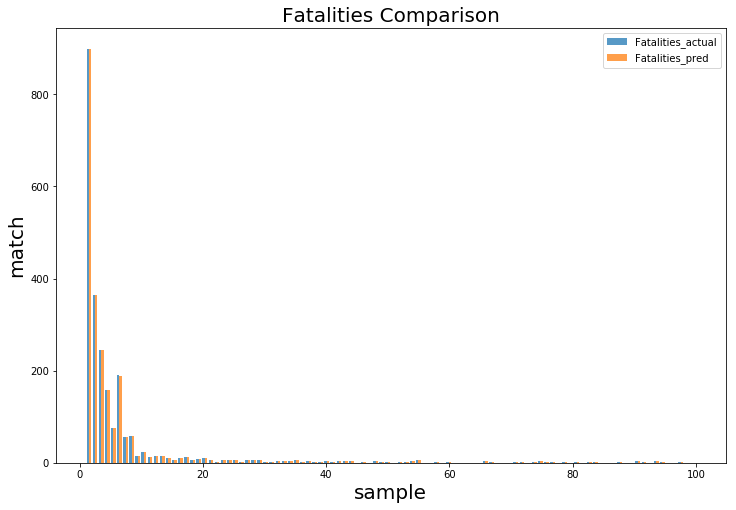

In [155]:
plt.figure(figsize=(12,8))
plt.hist([train_numeric_Y['Fatalities'],train_y_pred[:,1]],bins=100, range=(1,100), label=['Fatalities_actual','Fatalities_pred'],alpha=0.75)
plt.title('Fatalities Comparison',fontsize=20)
plt.xlabel('sample',fontsize=20)
plt.ylabel('match',fontsize=20)
plt.legend()
plt.show()

#### Root Mean Square Error

> Submissions are evaluated using the column-wise root mean squared logarithmic error.

In [160]:
error = np.sqrt((train_y_pred - train_numeric_Y)**2)
error = error.cumsum()

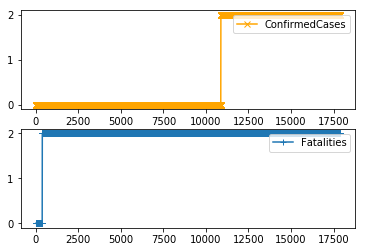

In [163]:
fig,ax = plt.subplots()
 
plt.xlabel('sample')
plt.ylabel('error')
plt.subplot(2, 1, 1)
plt.plot(range(len(error)), error['ConfirmedCases'], "x-",label="ConfirmedCases",color='orange')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(len(error)), error['Fatalities'], "+-", label="Fatalities")
plt.legend()

plt.show()

In [162]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(train_numeric_Y, train_y_pred , squared=False)
rmse

0.014952043467208555

### Correlation Visualization

#### Pearson

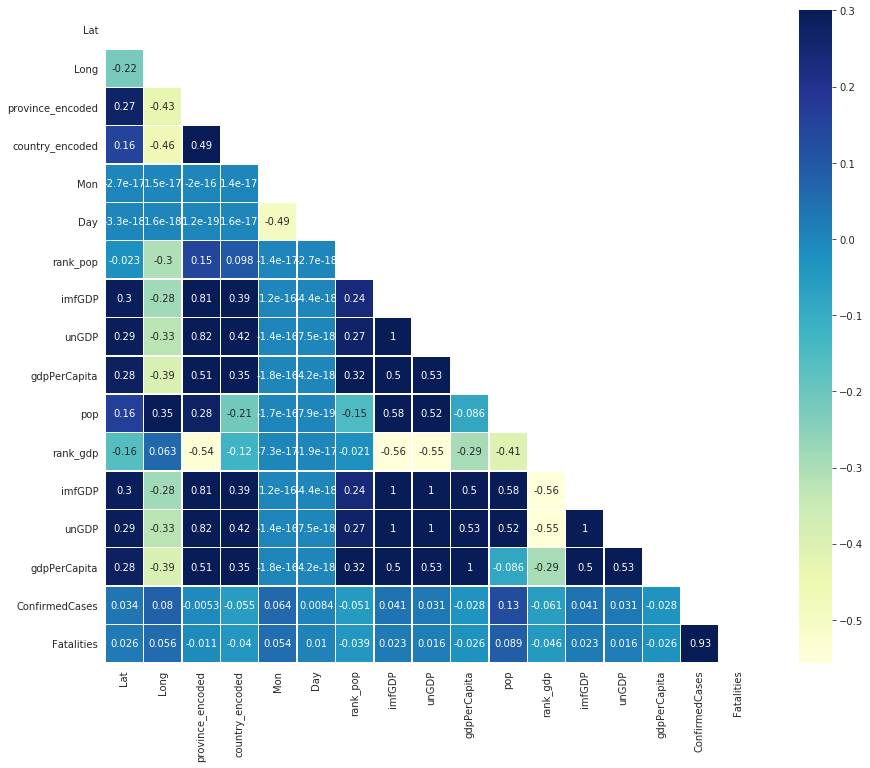

In [165]:
corr = train[numeric_features_X+numeric_features_Y].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Spearman

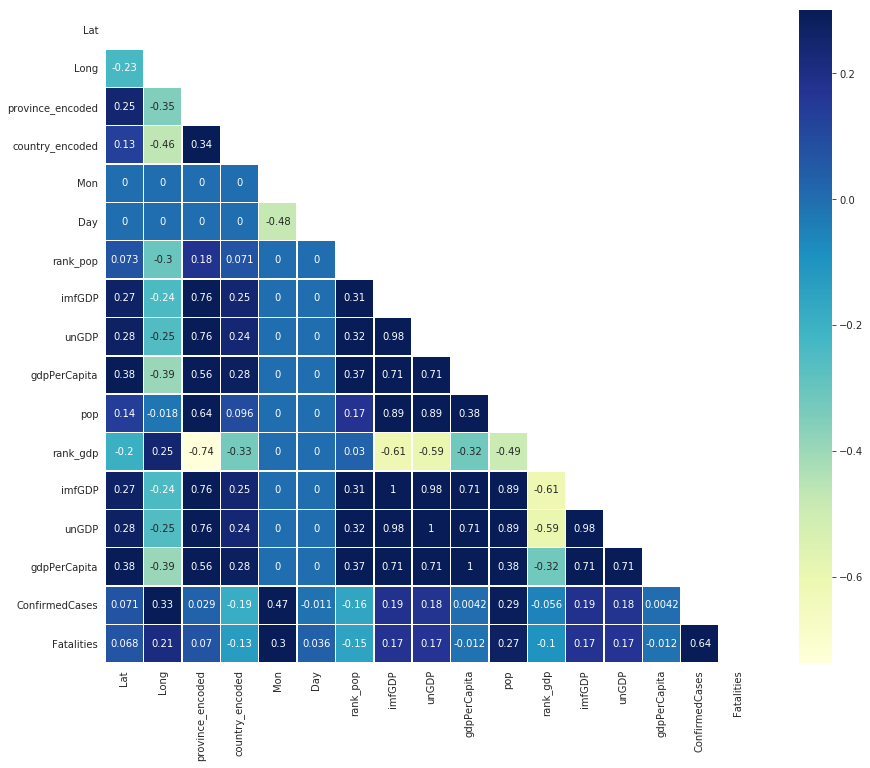

In [166]:
corr = train[numeric_features_X+numeric_features_Y].corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Kendall

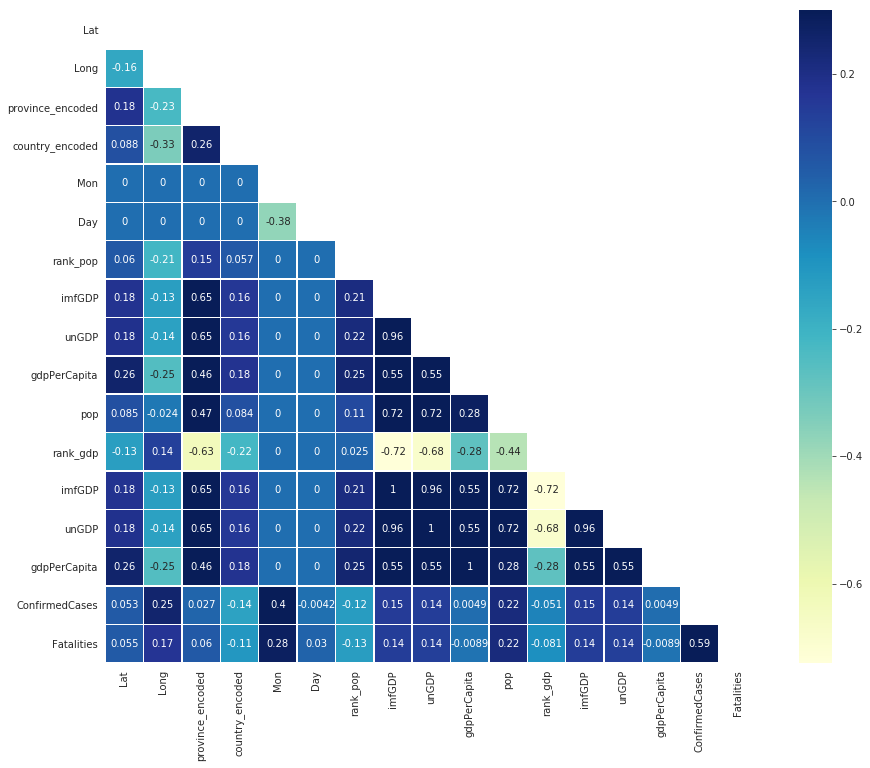

In [167]:
corr = train[numeric_features_X+numeric_features_Y].corr(method='kendall')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Weights

Parameter weights corresponding to `'Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day'`

In [168]:
RF_model.feature_importances_

array([0.08384827, 0.10516477, 0.08314877, 0.01835794, 0.13935027,
       0.39938566, 0.01844008, 0.02082981, 0.01607051, 0.01306127,
       0.03498658, 0.01594963, 0.01851685, 0.01686273, 0.01602683])

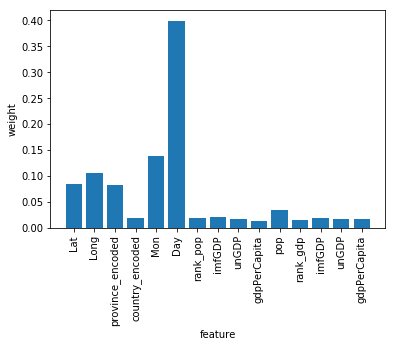

In [171]:
plt.bar(range(len(numeric_features_X)), RF_model.feature_importances_, tick_label=numeric_features_X)
plt.xlabel('feature')
plt.ylabel('weight')
plt.xticks(rotation=90)
plt.show()

#### Scatter Data points 

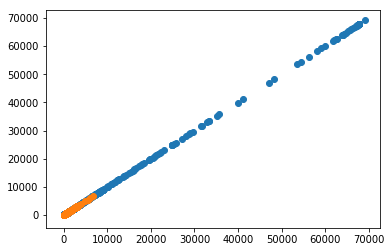

In [172]:
f,ax = plt.subplots()
ax.scatter(train_numeric_Y['ConfirmedCases'], train_y_pred[:,0])
ax.scatter(train_numeric_Y['Fatalities'], train_y_pred[:,1])

plt.show()

### Look into the number of decision tree composed of RF

In [173]:
clf1 = RandomForestClassifier(n_estimators=1,n_jobs=4)
clf3 = RandomForestClassifier(n_estimators=3,n_jobs=4)
clf5 = RandomForestClassifier(n_estimators=5,n_jobs=4)
clf10 = RandomForestClassifier(n_estimators=10,n_jobs=4)
clf50 = RandomForestClassifier(n_estimators=50,n_jobs=4)

In [174]:
clf1.fit(train_numeric_X, train_numeric_Y)
clf3.fit(train_numeric_X, train_numeric_Y)
clf5.fit(train_numeric_X, train_numeric_Y)
clf10.fit(train_numeric_X, train_numeric_Y)
clf50.fit(train_numeric_X, train_numeric_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [175]:
predicted1 = clf1.predict(train_numeric_X)
predicted3 = clf3.predict(train_numeric_X)
predicted5 = clf5.predict(train_numeric_X)
predicted10 = clf10.predict(train_numeric_X)
predicted50 = clf50.predict(train_numeric_X)

In [176]:
a = np.sum((predicted1) - (train_numeric_Y))**2 / len(predicted1)
b = np.sum((predicted3) - (train_numeric_Y))**2 / len(predicted3)
c = np.sum((predicted5) - (train_numeric_Y))**2 / len(predicted5)
d = np.sum((predicted10) - (train_numeric_Y))**2 / len(predicted10)
e = np.sum((predicted50) - (train_numeric_Y))**2 / len(predicted50)

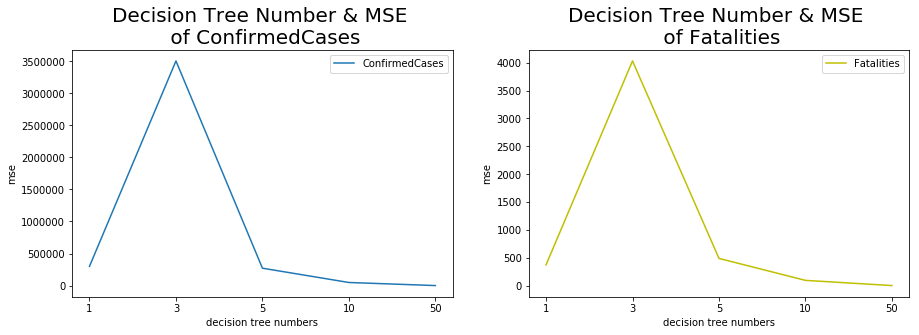

In [177]:
dt_nums = [1,3,5,10,50]
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Decision Tree Number & MSE \n of ConfirmedCases',fontsize=20)
plt.plot(range(len(dt_nums)), [a['ConfirmedCases'],b['ConfirmedCases'],c['ConfirmedCases'],d['ConfirmedCases'],e['ConfirmedCases']],
         label='ConfirmedCases')
plt.xlabel('decision tree numbers')
plt.ylabel('mse')
plt.xticks(range(len(dt_nums)),dt_nums)
plt.legend()

plt.subplot(222)
plt.title('Decision Tree Number & MSE \n of Fatalities',fontsize=20)
plt.plot(range(len(dt_nums)), [a['Fatalities'],b['Fatalities'],c['Fatalities'],d['Fatalities'],e['Fatalities']],
         label='Fatalities',color='y')
plt.xlabel('decision tree numbers')
plt.ylabel('mse')
plt.xticks(range(len(dt_nums)),dt_nums)
plt.legend()

plt.show()

Above diagram demostrated that with about 5 decision tree, RF had been enough good to fit in our dataset 

### Look into the depth of decision tree composed of RF - Avoiding Overfitting

In [178]:
clf1 = RandomForestClassifier(n_estimators=10,n_jobs=4,max_depth=1)
clf2 = RandomForestClassifier(n_estimators=10,n_jobs=4,max_depth=2)
clf3 = RandomForestClassifier(n_estimators=10,n_jobs=4,max_depth=3)
clf4 = RandomForestClassifier(n_estimators=10,n_jobs=4,max_depth=4)
clf5 = RandomForestClassifier(n_estimators=10,n_jobs=4,max_depth=5)
clf10 = RandomForestClassifier(n_estimators=10,n_jobs=4,max_depth=10)

In [179]:
clf1.fit(train_numeric_X, train_numeric_Y)
clf2.fit(train_numeric_X, train_numeric_Y)
clf3.fit(train_numeric_X, train_numeric_Y)
clf4.fit(train_numeric_X, train_numeric_Y)
clf5.fit(train_numeric_X, train_numeric_Y)
clf10.fit(train_numeric_X, train_numeric_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [180]:
predicted1 = clf1.predict(train_numeric_X)
predicted2 = clf2.predict(train_numeric_X)
predicted3 = clf3.predict(train_numeric_X)
predicted4 = clf4.predict(train_numeric_X)
predicted5 = clf5.predict(train_numeric_X)
predicted10 = clf10.predict(train_numeric_X)

In [181]:
a = np.sum((predicted1) - (train_numeric_Y))**2 / len(predicted1)
b = np.sum((predicted2) - (train_numeric_Y))**2 / len(predicted2)
c = np.sum((predicted3) - (train_numeric_Y))**2 / len(predicted3)
d = np.sum((predicted4) - (train_numeric_Y))**2 / len(predicted4)
e = np.sum((predicted5) - (train_numeric_Y))**2 / len(predicted5)
f = np.sum((predicted10) - (train_numeric_Y))**2 / len(predicted10)

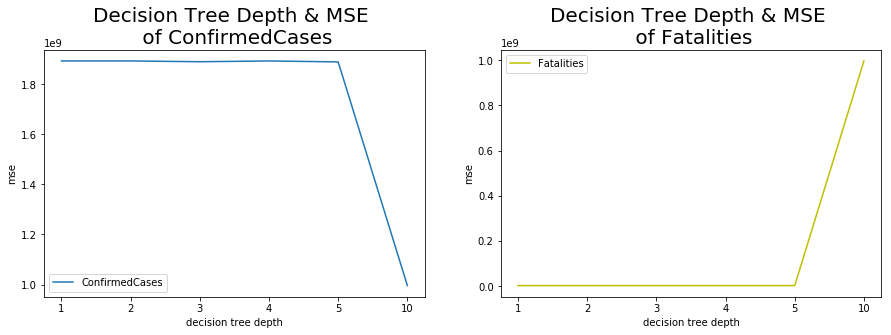

In [182]:
dt_nums = [1,2,3,4,5,10]
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Decision Tree Depth & MSE \n of ConfirmedCases',fontsize=20)
plt.plot(range(len(dt_nums)), [a['ConfirmedCases'],b['ConfirmedCases'],c['ConfirmedCases'],d['ConfirmedCases'],e['ConfirmedCases'],f['ConfirmedCases']],
         label='ConfirmedCases')
plt.xlabel('decision tree depth')
plt.ylabel('mse')
plt.xticks(range(len(dt_nums)),dt_nums)
plt.legend()

plt.subplot(222)
plt.title('Decision Tree Depth & MSE \n of Fatalities',fontsize=20)
plt.plot(range(len(dt_nums)), [a['Fatalities'],b['Fatalities'],c['Fatalities'],d['Fatalities'],e['Fatalities'],f['ConfirmedCases']],
         label='Fatalities',color='y')
plt.xlabel('decision tree depth')
plt.ylabel('mse')
plt.xticks(range(len(dt_nums)),dt_nums)
plt.legend()

plt.show()

The deeper depth gets the lower mse in confirmedCases but the higher fatalities

#### PCA to 2-D space

In [183]:
from sklearn.decomposition import PCA

In [184]:
pca = PCA(n_components=2)

In [185]:
pca_X = pca.fit_transform(train_numeric_X)

In [186]:
pca_testX = pca.transform(test_numeric_X)

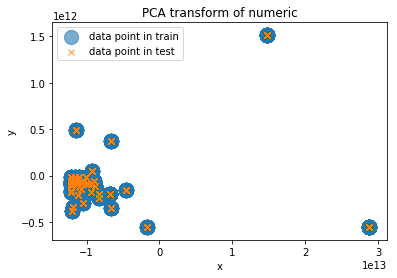

In [187]:
plt.title('PCA transform of numeric')
plt.scatter(pca_X[:,0], pca_X[:,1],label='data point in train',alpha=0.6,s=200)
plt.scatter(pca_testX[:,0], pca_testX[:,1],label='data point in test',alpha=0.6,marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()